In [23]:
# Import necessary libraries
from IPython.display import display, HTML
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import lime
import numpy as np
import pandas as pd
import shap

In [24]:
random_state = 42
sample_size = 5000 # out of 20640

# Load the california housing dataset and shuffle and sample down to 1000 instances
housing = fetch_california_housing()
shuffled_housing = shuffle(housing.data, housing.target, random_state=random_state, n_samples=sample_size)

X = pd.DataFrame(shuffled_housing[0], columns=housing.feature_names)
y = pd.DataFrame(shuffled_housing[1], columns=["MEDV"])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

In [25]:
# Train a model
model = RandomForestRegressor(n_estimators=100, random_state=random_state)
model.fit(X_train, y_train.values.ravel())

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)


In [26]:
# Compute permutation feature importance
r = permutation_importance(model, X_test, y_test,
                           n_repeats=30,
                           random_state=random_state)
for i in r.importances_mean.argsort()[::-1]:
    print(f"{housing.feature_names[i]:<10}: "
          f"{r.importances_mean[i]:.3f}"
          f" +/- {r.importances_std[i]:.3f}")


In [27]:
# Compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")


RandomForestRegressor - MSE: 7.901513892156864, MAE: 2.0395392156862746, R^2: 0.8922527442109116


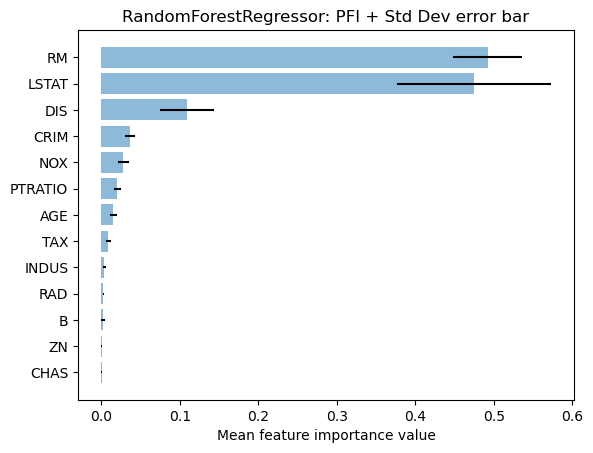

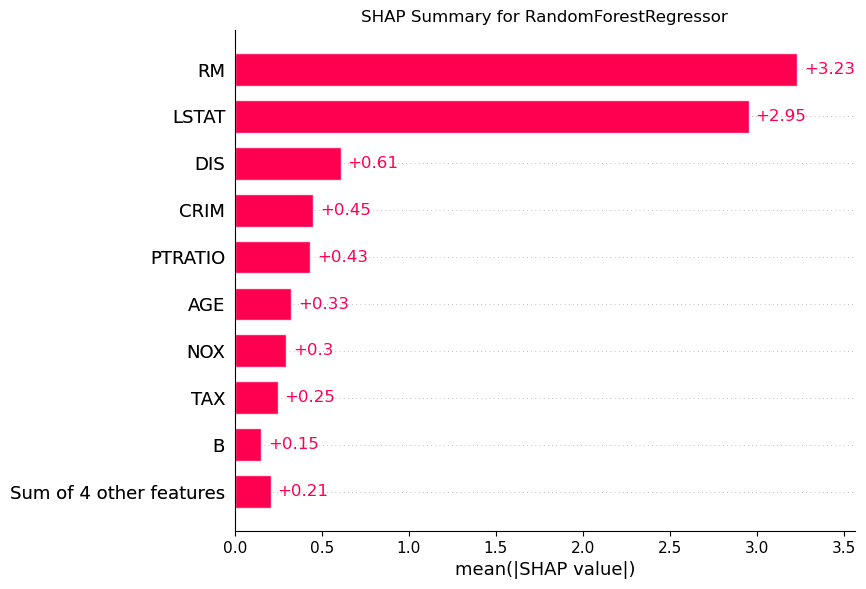

Intercept 25.687306046155992
Prediction_local [19.94268298]
Right: 19.786


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


<IPython.core.display.HTML object>

XGBRegressor - MSE: 6.560527271813469, MAE: 1.9574996602301502, R^2: 0.9105388132305845


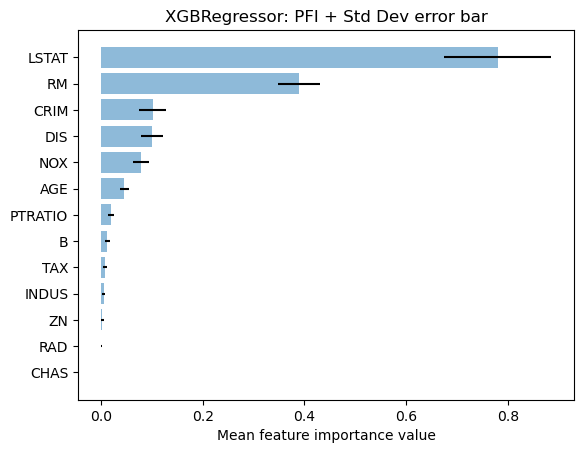

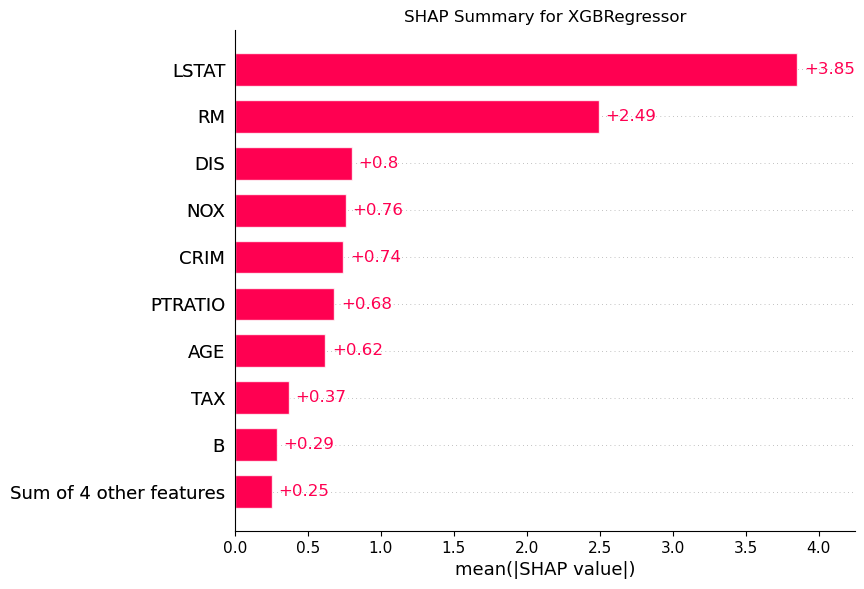

Intercept 24.30756788613381
Prediction_local [23.15117318]
Right: 22.9362


<IPython.core.display.HTML object>

In [28]:
# Compute LIME explanations
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=housing.feature_names,
                                                   class_names=['MEDV'],
                                                   verbose=True,
                                                   mode='regression')
i = np.random.randint(0, X_test.shape[0])
exp = explainer.explain_instance(X_test.values[i], model.predict, num_features=5)
# Display the LIME explanation
display(HTML(exp.show_in_notebook(exp.show_in_notebook(show_table=True))))

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu